# Team Anomaly Detection Project

## About Project: 

### Description: 

In this project a teammate and I will be answering questions presented in an email from our boss concerning codeup curriculum traffic. 

### Project Goal: 

The goal of this project is to answer the questions in the email and return a email with the answers, the requested slide, and the link to this github repo. 

### Email from Boss: 

Hello,


I have some questions for you that I need to be answered before the Board meeting on Monday evening. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you,

### Additional Info: 

Data was acquired from Codeup's SQL database and additional contextual info was gathered from alumni.codeup.com. 

The Board meeting on Monday evening that the slide will be presented in is to discuss the general state of things and update the stakeholders (What’s the direction we are going in, and is it a good one?).

## Let's Get Started,... 

## Imports. 

These are the following imports needed to run this notebook:

In [1]:
# imports
import numpy as np
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# My Files
import env
from wrangle import *

## Acquire & Prepare. 

I acquired and prepared the data using a function stored in wrangle.py that reads data from a csv and prepares it by: 
    
    concats date + time 
    changes date_time to pd datetime
    changes date to pd datetime
    changes time to pd datetime
    sets index to date_time
    changes cohort start to datetime
    changes cohort end to datetime
    label students by the program they are in
    create column where true or false if staff
    create column with date - end date
    drop columns
    returns df

In [2]:
df = get_n_prep_curr_logs()

In [3]:
df.head()

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days
2018-01-26 09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:02,php,False,720 days
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:05,php,False,720 days
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:06,php,False,720 days
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2018-01-26 09:56:24,java,False,-111 days


In [4]:
# confirm there are no nulls
# df.isna().sum()

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

I will start by looking at the ips with the most activity. 

In [5]:
# look at the amount of pages an ip looked at per second. The more per second = the more suspicious they are.
df.ip.index.value_counts().head(20)

2019-03-03 22:52:09    30
2019-03-03 22:52:07    30
2019-03-03 22:52:11    25
2019-03-03 22:52:08    25
2019-03-03 22:52:10    25
2019-03-03 22:52:06    21
2020-08-02 19:07:51    16
2019-12-19 23:57:58    12
2019-03-03 22:52:12    12
2020-04-05 17:41:11    12
2019-12-19 23:57:56    12
2019-12-19 23:58:01    12
2019-12-19 23:57:59    11
2021-04-01 16:08:25    11
2020-04-05 17:41:10    10
2020-04-05 17:42:00    10
2019-12-19 23:58:00    10
2020-08-02 19:07:50    10
2019-12-19 23:57:54     9
2019-12-19 23:58:07     9
Name: date_time, dtype: int64

I'm going to check out the 2019-03-03 because in 6 seconds that IP visited 156 pages. 

Takeaways from date 2019-03-03: 

Looks like they may have been web scraping and got the whole Web Dev curriculum. 

user_id: 341

ip: 204.44.112.76

cohort: Zion

start date: 2019-01-22

end date: 2019-06-04

program: java

days_after_grad: 93 days before graduation

Seems to have only used that IP address that one day to web scrape and only looked at Web Dev even though the Data Science program was up and running at this time.

In [6]:
df[df.index == '2019-03-03 22:52:09'].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2019-03-03 22:52:09,mysql/databases,341,29.0,2,204.44.112.76,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2019-03-03 22:52:09,java,False,-93 days


In [7]:
df[df.index == '2019-03-03 22:52:07'].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2019-03-03 22:52:07,javascript-i/introduction,341,29.0,2,204.44.112.76,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2019-03-03 22:52:07,java,False,-93 days


In [8]:
df[df.index == '2019-03-03 22:52:06'].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2019-03-03 22:52:06,javascript-i,341,29.0,2,204.44.112.76,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2019-03-03 22:52:06,java,False,-93 days


In [9]:
df[df.index == '2019-03-03 22:52:11'].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2019-03-03 22:52:11,appendix/extra-challenges/basic-challenges,341,29.0,2,204.44.112.76,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2019-03-03 22:52:11,java,False,-93 days


In [10]:
# check to see if this ip was used besides the seconds looked at above
df[(df.ip == '204.44.112.76') & (df.index != '2019-03-03 22:52:06') & (df.index != '2019-03-03 22:52:07') & (df.index != '2019-03-03 22:52:08') & (df.index != '2019-03-03 22:52:09') & (df.index != '2019-03-03 22:52:10') & (df.index != '2019-03-03 22:52:11')].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2019-03-03 22:52:05,html-css,341,29.0,2,204.44.112.76,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2019-03-03 22:52:05,java,False,-93 days


In [11]:
# confirm timeframe
df[df.ip=='204.44.112.76'].index.value_counts().sort_index()

2019-03-03 22:52:05     1
2019-03-03 22:52:06    21
2019-03-03 22:52:07    30
2019-03-03 22:52:08    25
2019-03-03 22:52:09    30
2019-03-03 22:52:10    25
2019-03-03 22:52:11    25
2019-03-03 22:52:12    12
2019-03-03 23:00:57     1
2019-03-03 23:01:16     1
2019-03-03 23:01:21     1
2019-03-03 23:01:38     1
2019-03-03 23:02:31     1
2019-03-03 23:03:07     1
2019-03-03 23:09:30     1
2019-03-03 23:09:51     1
2019-03-03 23:10:08     1
2019-03-03 23:10:32     1
2019-03-03 23:10:40     1
Name: date_time, dtype: int64

This IP was only used on this day and only to look at Web Dev even though the Data Science program was up and running at this time. 

In [12]:
# check the amount of user ids
len(df.user_id.unique())

911

In [13]:
# check the amount of ips 
len(df.ip.unique())

5200

^ This confirms that multiple ips can belong to one user.

Because of this and the fact that the suspicious ip above only accessed lessons once on one day, let's find other ips that only looked at a lesson once. 

In [14]:
# look at ip counts where it was only accessed a lesson once
ip_counts = df.groupby(['ip'])['path'].nunique()
ip_counts[ip_counts==1].head()

ip
104.156.210.199    1
104.176.91.161     1
104.184.220.38     1
104.184.27.54      1
104.190.247.101    1
Name: path, dtype: int64

In [15]:
# look at lessons accessed by one user id on only one day using one ip address
single_access = df.groupby(['user_id'])['date_time','path','ip'].nunique()
single_access[(single_access.date_time == 1) & (single_access.path == 1) & (single_access.ip == 1)]

,date_time,path,ip
user_id,,,
66,1,1,1
163,1,1,1
165,1,1,1
212,1,1,1
592,1,1,1
593,1,1,1
619,1,1,1
649,1,1,1
652,1,1,1


I want to see days that had an abnormal number of lessons accessed. 

In [16]:
# lessons accessed per days
lessons = df['path'].resample('d').count()
lessons.head()

date_time
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: path, dtype: int64

In [17]:
# 7 day EMA
ema_7d = lessons.ewm(span = 7).mean()

In [18]:
# 14 days EMA
ema_14d = lessons.ewm(span = 14).mean()

In [19]:
# 30 days EMA
ema_30d = lessons.ewm(span = 30).mean()

In [20]:
# 90 days EMA
ema_90d = lessons.ewm(span = 90).mean()

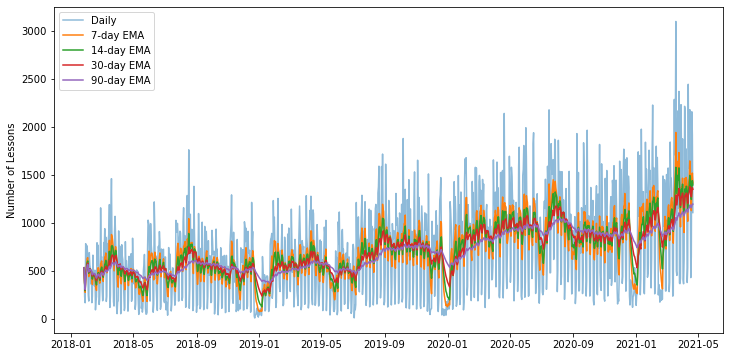

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(lessons.index, lessons, label='Daily', alpha=.5)

ax.plot(lessons.index, ema_7d, label = '7-day EMA')
ax.plot(lessons.index, ema_14d, label = '14-day EMA')
ax.plot(lessons.index, ema_30d, label = '30-day EMA')
ax.plot(lessons.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of Lessons')

plt.show()

I'll use Bollinger Bands to set a standard and see what falls above or below "abnormal". 

In [22]:
# set the window span
span = 30

# compute midband
midband = lessons.ewm(span = 30).mean()
midband.head()

date_time
2018-01-26    533.000000
2018-01-27    376.450000
2018-01-28    302.284709
2018-01-29    434.739290
2018-01-30    475.525441
Freq: D, Name: path, dtype: float64

In [23]:
# compute exponential moving stdev
std = lessons.ewm(span = 30).std()
std.head()

date_time
2018-01-26           NaN
2018-01-27    214.253355
2018-01-28    192.738756
2018-01-29    292.489456
2018-01-30    262.780177
Freq: D, Name: path, dtype: float64

In [24]:
# set std to 3
ub = midband + std * 3
lb = midband - std * 3
ub.head(1)

date_time
2018-01-26   NaN
Freq: D, Name: path, dtype: float64

In [25]:
lb.head(1)

date_time
2018-01-26   NaN
Freq: D, Name: path, dtype: float64

In [26]:
# concat pages, midband, lb and ub to create a new df 'my_df'

my_df = pd.concat([lessons, midband, ub, lb], axis =1)

my_df.columns = ['lessons', 'midband', 'ub', 'lb']
my_df.head()

,lessons,midband,ub,lb
date_time,,,,
2018-01-26,533,533.000000,NaN,NaN
2018-01-27,230,376.450000,1019.210064,-266.310064
2018-01-28,168,302.284709,880.500977,-275.931559
2018-01-29,783,434.739290,1312.207658,-442.729079
2018-01-30,614,475.525441,1263.865971,-312.815089


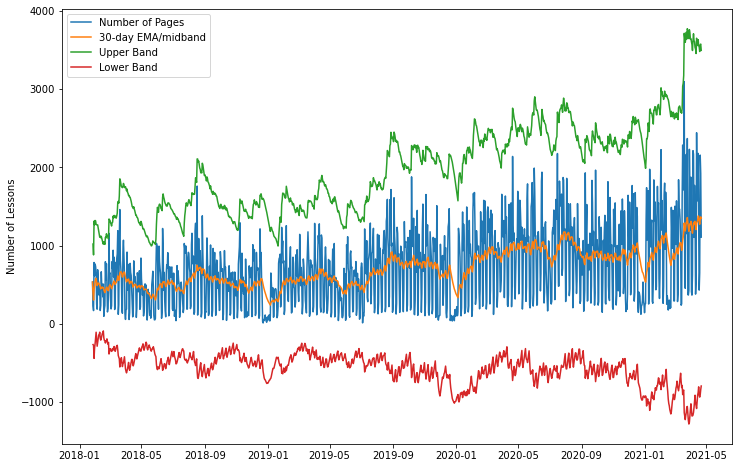

In [27]:
#Plot the bands
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.lessons, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of Lessons')

plt.show()

In [28]:
#Compute pct_b
my_df['pct_b'] = (my_df['lessons'] - my_df['lb'])/ (my_df['ub'] - my_df['lb'])
my_df.head()


,lessons,midband,ub,lb,pct_b
date_time,,,,,
2018-01-26,533,533.000000,NaN,NaN,NaN
2018-01-27,230,376.450000,1019.210064,-266.310064,0.386077
2018-01-28,168,302.284709,880.500977,-275.931559,0.383880
2018-01-29,783,434.739290,1312.207658,-442.729079,0.698446
2018-01-30,614,475.525441,1263.865971,-312.815089,0.587827


In [29]:
my_df[my_df.pct_b > 1]


,lessons,midband,ub,lb,pct_b
date_time,,,,,


In [31]:
def acquire_logs(user=env.user, password=env.password, host=env.host):
    '''
    This function queries the Codeup MySQL curriculum_logs database and returns a dataframe
    '''
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    query = '''
    SELECT date,
           ip,
           path as endpoint,
           user_id,
           cohort_id,
           ip as source_ip
    FROM logs;
    '''
    df = pd.read_sql(query, url)
    return df


In [32]:
df = acquire_logs()
df.head()

,date,ip,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,97.105.19.61,/,1,8.0,97.105.19.61
1,2018-01-26,97.105.19.61,java-ii,1,8.0,97.105.19.61
2,2018-01-26,97.105.19.61,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,97.105.19.61,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,97.105.19.61,javascript-i/conditionals,2,22.0,97.105.19.61


In [35]:
def one_ip_df_prep(df, ip):
    '''
    This function returns a dataframe consisting of data for only a single defined ip
    '''
    df = df[df.ip == ip]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_ip = df['endpoint'].resample('d').count()
    return pages_one_ip

def compute_pct_b(pages_one_ip, span, weight, ip):
    '''
    This function adds the %b of a bollinger band range for the page views of a single ip's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_ip.ewm(span=span).mean()
    stdev = pages_one_ip.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_ip, midband, bb], axis=1)
    my_df.columns = ['pages_one_ip', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant ip to dataframe
    my_df['pct_b'] = (my_df['pages_one_ip'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['ip'] = ip
    return my_df

def plot_bands(my_df, ip):
    '''
    This function plots the bolliger bands of the page views for a single ip
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_ip, label='Number of Pages, ip: '+str(ip))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, ip, span, weight, plot=False):
    '''
    This function returns the records where a ip's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_ip = one_ip_df_prep(df, ip)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_ip, span, weight, ip)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, ip)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [36]:
ip = 1
span = 30
weight = 6
ip_df = find_anomalies(df, ip, span, weight)

anomalies = pd.DataFrame()
ip_df = find_anomalies(df, ip, span, weight)
anomalies = pd.concat([anomalies, ip_df], axis=0)

In [37]:
anomalies.head()

,pages_one_ip,midband,ub,lb,pct_b,ip
date,,,,,,


In [39]:
# Use function in a loop examining all users:

In [38]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.ip.unique()):
    ip_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, ip_df], axis=0)

In [40]:
anomalies

,pages_one_ip,midband,ub,lb,pct_b,ip
date,,,,,,
2018-03-14,9,0.627485,8.702895,-7.447925,1.018396,71.137.146.71
2018-05-06,10,0.727782,9.678436,-8.222872,1.017963,71.137.146.71
2018-07-30,604,51.705165,572.609944,-469.199614,1.030130,192.171.117.210
2018-09-12,631,58.364258,617.553763,-500.825247,1.012023,192.171.117.210
2019-03-01,233,27.234868,227.706199,-173.236463,1.013203,192.171.117.210
...,...,...,...,...,...,...
2021-03-30,10,0.698430,9.762768,-8.365908,1.013086,70.40.28.157
2021-04-07,11,0.773213,10.725035,-9.178608,1.013815,45.27.14.73
2021-04-19,27,1.792736,25.733026,-22.147553,1.026461,95.181.238.19


In [41]:
# sort by %b?
anomalies.sort_values(by='pct_b', ascending=False)

,pages_one_ip,midband,ub,lb,pct_b,ip
date,,,,,,
2019-12-13,6,0.387097,5.634365,-4.860171,1.034841,71.41.243.19
2020-07-01,5,0.322581,4.695304,-4.050142,1.034841,99.158.247.126
2020-07-04,1,0.064516,0.939061,-0.810028,1.034841,172.56.7.58
2020-06-27,4,0.258065,3.756243,-3.240114,1.034841,172.56.6.112
2020-02-15,6,0.387097,5.634365,-4.860171,1.034841,172.58.102.174
...,...,...,...,...,...,...
2021-03-07,25,2.200179,24.991306,-20.590948,1.000191,72.179.177.9
2020-02-18,5,0.367804,4.998938,-4.263330,1.000115,70.121.215.53
2018-03-09,9,0.666319,8.998529,-7.665891,1.000088,108.239.187.113


In [42]:
anomalies.sort_values(by='pages_one_ip', ascending=False)

,pages_one_ip,midband,ub,lb,pct_b,ip
date,,,,,,
2020-02-11,793,51.161290,744.675179,-642.352599,1.034841,72.128.136.219
2018-09-12,631,58.364258,617.553763,-500.825247,1.012023,192.171.117.210
2018-07-30,604,51.705165,572.609944,-469.199614,1.030130,192.171.117.210
2019-03-01,233,27.234868,227.706199,-173.236463,1.013203,192.171.117.210
2018-06-02,198,13.983080,186.442172,-158.476011,1.033509,108.65.244.91
...,...,...,...,...,...,...
2019-05-06,1,0.064638,0.939976,-0.810701,1.034286,99.203.27.9
2019-11-03,1,0.065649,0.955412,-0.824114,1.025056,129.115.2.245
2019-07-25,1,0.064516,0.939061,-0.810028,1.034841,192.67.54.12


In [44]:
df_793_219 = one_ip_df_prep(df, '72.128.136.219')

<AxesSubplot:xlabel='date'>

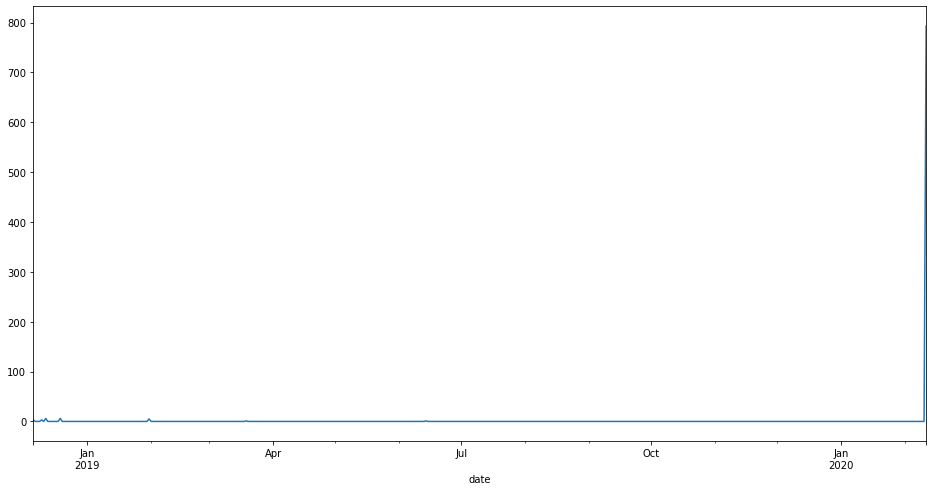

In [45]:
df_793_219.plot(figsize=(16,8))

Do it again for users: 

In [46]:
def acquire_logs(user=env.user, password=env.password, host=env.host):
    '''
    This function queries the Codeup MySQL curriculum_logs database and returns a dataframe
    '''
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    query = '''
    SELECT date,
           ip,
           path as endpoint,
           user_id,
           cohort_id,
           ip as source_ip
    FROM logs;
    '''
    df = pd.read_sql(query, url)
    return df

def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['endpoint'].resample('d').count()
    return pages_one_user

def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [48]:
# for 1 user
user = 1
span = 30
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [49]:
# loop for all users
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [50]:
anomalies

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


In [52]:
# sort by %b
anomalies.sort_values(by='pct_b', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2020-12-24,1,0.064516,0.939061,-0.810028,1.034841,232
2020-12-16,12,0.774194,11.268729,-9.720342,1.034841,156
2020-09-13,4,0.258065,3.756243,-3.240114,1.034841,210
2020-05-12,16,1.032258,15.024972,-12.960456,1.034841,93
2019-09-12,16,1.032258,15.024972,-12.960456,1.034841,94
...,...,...,...,...,...,...
2021-03-23,146,26.440411,145.913292,-93.032470,1.000363,581
2020-09-17,24,2.103030,23.984360,-19.778300,1.000357,560
2020-10-27,17,1.232625,16.991469,-14.526220,1.000271,613


In [53]:
anomalies.sort_values(by='pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
...,...,...,...,...,...,...
2019-05-21,1,0.064519,0.939144,-0.810106,1.034790,19
2020-11-21,1,0.065202,0.959398,-0.828994,1.022703,410
2019-03-20,1,0.064516,0.939061,-0.810029,1.034841,126


User 341 looked at 272 lessons on a single day. This is the same user we identified when looking at IP activity earlier. Let's plot this activity: 

In [58]:
df_341 = one_user_df_prep(df, 341)

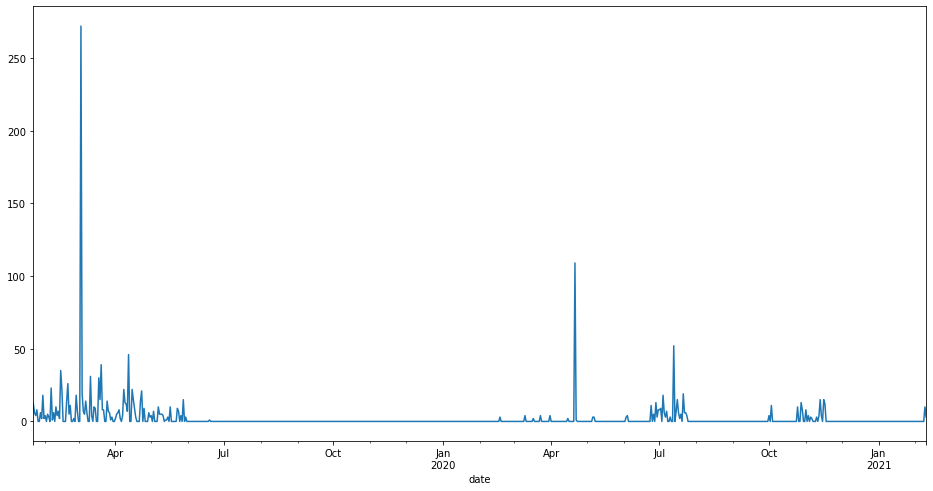

In [60]:
df_341.plot(figsize=(16,8));

In [61]:
# show other users that show up the most often 
anomalies.user_id.value_counts()

88     12
146    11
80     11
18     10
291     9
       ..
526     1
527     1
528     1
206     1
859     1
Name: user_id, Length: 413, dtype: int64

<AxesSubplot:xlabel='date'>

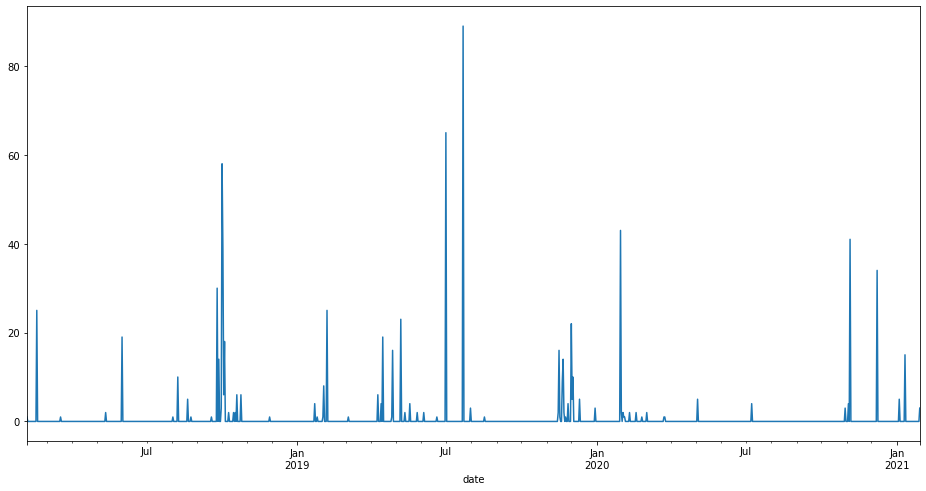

In [62]:
df_88 = one_user_df_prep(df, 88)
df_88.plot(figsize=(16,8))

In [63]:
df = get_n_prep_curr_logs()

In [66]:
df_88 = df[df.user_id == 88]
df_88

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-06-01 15:14:04,/,88,7.0,1,66.90.136.214,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-06-01 15:14:04,php,False,969 days
2018-06-01 15:14:19,javascript-ii,88,7.0,1,66.90.136.214,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-06-01 15:14:19,php,False,969 days
2018-06-01 15:15:07,javascript-ii,88,7.0,1,66.90.136.214,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-06-01 15:15:07,php,False,969 days
2018-06-01 15:15:13,javascript-ii,88,7.0,1,66.90.136.214,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-06-01 15:15:13,php,False,969 days
2018-06-01 15:15:17,php,88,7.0,1,66.90.136.214,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-06-01 15:15:17,php,False,969 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11 15:04:08,content/html-css/elements.html,88,7.0,1,136.50.6.131,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2021-01-11 15:04:08,php,False,1924 days
2021-01-11 15:04:09,content/html-css/forms.html,88,7.0,1,136.50.6.131,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2021-01-11 15:04:09,php,False,1924 days
2021-01-29 23:32:23,/,88,7.0,1,136.50.6.131,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2021-01-29 23:32:23,php,False,1942 days


Looks like user from Glacier cohort has been consistently looking at lessons since their cohort in 2015.

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [5]:
# column with year 
df['year'] = df.index.year
df.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days,2018


In [82]:
# df where year in index is 2019
df_2019 = df[df.index.year == 2019]
df_2019.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,26.0,2,73.31.215.224,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2019-01-01 07:45:45,java,False,-38 days,2019


In [7]:
# rename the labels in program so that web_dev is grouped together 
df_2019['program'].replace({'php': 'web_dev', 'java': 'web_dev', 'data_science': 'data_science', 'front_end': 'web_dev'}, inplace=True)
    

In [9]:
df_2019.program.value_counts()

web_dev         203174
data_science     20068
Name: program, dtype: int64

In [12]:
# Remove Limits On Viewing Dataframes
pd.set_option('display.max_rows', None)

In [81]:
df_2019[(df_2019.program == 'web_dev') & (df_2019.path.str.contains('science'))].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:39:14,web_dev,False,135 days,2019


A Web Dev student (user_id: 220) from the Wrangell cohort accessed the data-science curriculum on 2019-04-13 but another Web Dev staff member (user_id: 410) didn't access the data science curriculum until 2019-08-15.

In [79]:
df_2019[(df_2019.program == 'data_science') & (df_2019.path.str.contains('java'))].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-23 11:45:09,data_science,False,-129 days,2019


In [59]:
both_2019 = df_2019[((df_2019.program == 'web_dev') & (df_2019.path.str.contains('science'))) | ((df_2019.program == 'data_science') & (df_2019.path.str.contains('java')))]


In [80]:
both_2019.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:39:14,web_dev,False,135 days,2019


In [61]:
activity_2019 = both_2019['path'].resample('d').count()

In [63]:
# daily counts for number of pages viewed by people that were in one program (Web Dev or Data Science) viewing another
activity_2019.head()

date_time
2019-04-13    2
2019-04-14    0
2019-04-15    0
2019-04-16    0
2019-04-17    0
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date_time'>

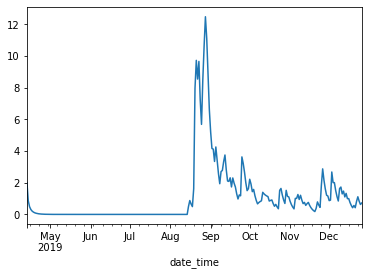

In [65]:
# exponential moving avg 
# looking for change in access from one program to another's curr
# 7 day EMA
ema_7d = activity_2019.ewm(span = 7).mean()
ema_7d.plot()

<AxesSubplot:xlabel='date_time'>

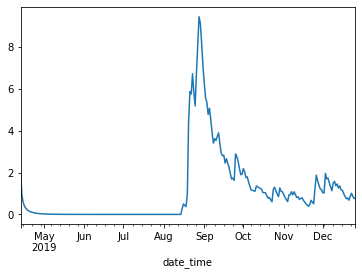

In [66]:
# 14 days EMA
ema_14d = activity_2019.ewm(span = 14).mean()
ema_14d.plot()

<AxesSubplot:xlabel='date_time'>

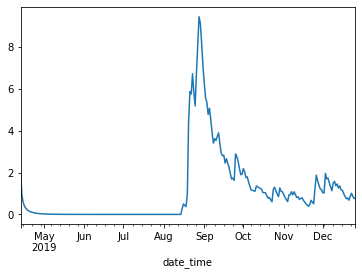

In [67]:
# 30 days EMA
ema_30d = activity_2019.ewm(span = 30).mean()
ema_14d.plot()

<AxesSubplot:xlabel='date_time'>

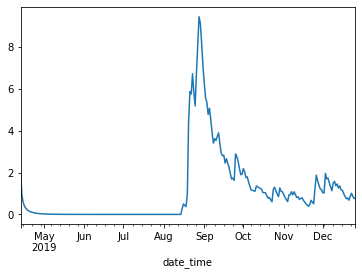

In [69]:
# 90 days EMA
ema_90d = activity_2019.ewm(span = 90).mean()
ema_14d.plot()

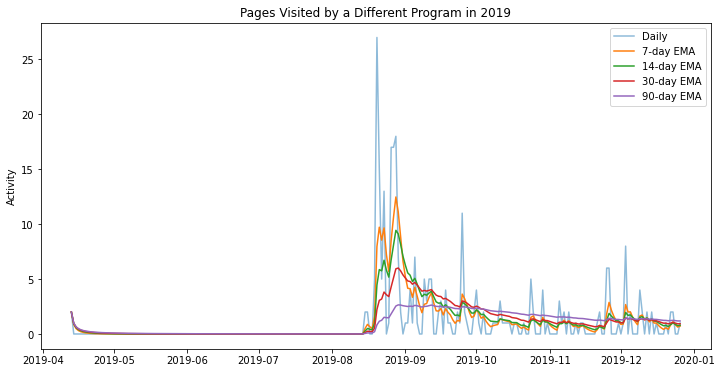

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(activity_2019.index, activity_2019, label='Daily', alpha=.5)

ax.plot(activity_2019.index, ema_7d, label = '7-day EMA')
ax.plot(activity_2019.index, ema_14d, label = '14-day EMA')
ax.plot(activity_2019.index, ema_30d, label = '30-day EMA')
ax.plot(activity_2019.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Activity')
plt.title('Pages Visited by a Different Program in 2019')

plt.show()

I'll do the same thing as above for 2018. 

In [87]:
# rename the labels in program so that web_dev is grouped together 
df['program'].replace({'php': 'web_dev', 'java': 'web_dev', 'data_science': 'data_science', 'front_end': 'web_dev'}, inplace=True)


In [88]:
df.program.value_counts()

web_dev         743918
data_science    103411
Name: program, dtype: int64

In [89]:
both_all = df[((df.program == 'web_dev') & (df.path.str.contains('science'))) | ((df.program == 'data_science') & (df.path.str.contains('java')))]


In [90]:
both_all.head(1)


,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:39:14,web_dev,False,135 days,2019


In [91]:
both_activity_all = both_all['path'].resample('d').count()


In [92]:
# daily counts for number of pages viewed by people that were in one program (Web Dev or Data Science) viewing another
both_activity_all.head()

date_time
2019-04-13    2
2019-04-14    0
2019-04-15    0
2019-04-16    0
2019-04-17    0
Freq: D, Name: path, dtype: int64

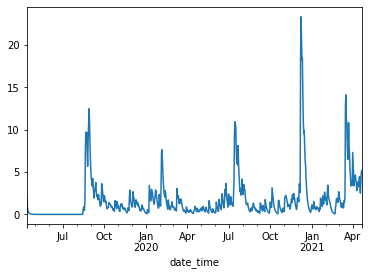

In [95]:
# exponential moving avg 
# looking for change in access from one program to another's curr
# 7 day EMA
ema_7d = both_activity_all.ewm(span = 7).mean()
ema_7d.plot();

In [99]:
# 14 days EMA
ema_14d = both_activity_all.ewm(span = 14).mean()

In [100]:
# 30 days EMA
ema_30d = both_activity_all.ewm(span = 30).mean()

In [101]:
# 90 days EMA
ema_90d = both_activity_all.ewm(span = 90).mean()

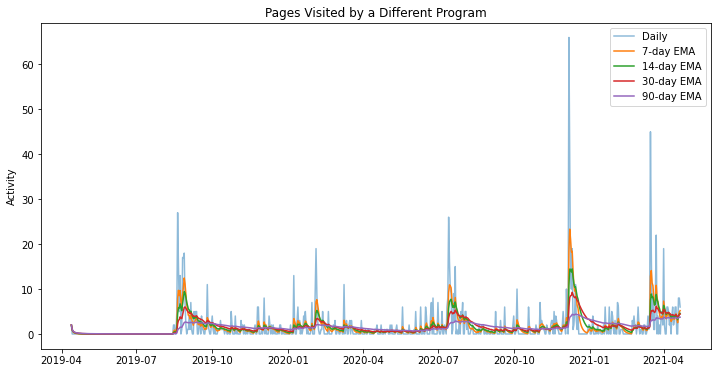

In [103]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(both_activity_all.index, both_activity_all, label='Daily', alpha=.5)

ax.plot(both_activity_all.index, ema_7d, label = '7-day EMA')
ax.plot(both_activity_all.index, ema_14d, label = '14-day EMA')
ax.plot(both_activity_all.index, ema_30d, label = '30-day EMA')
ax.plot(both_activity_all.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Activity')
plt.title('Pages Visited by a Different Program')

plt.show()

Codeup didn't have a Data Science program in 2018, that's why there isn't activity then. The first cohort started in January 2019. There's a notable spike on a day at the end of 2020 that is worth looking into as well as what looks like March 2021. 

What studentd or staff were supposed to be able to view both? 

In [25]:
cross_over = pd.DataFrame(df_2019.groupby(by='user_id').cohort_id.nunique().sort_values(ascending=False))

In [38]:
df_2019.groupby(by='user_id').cohort_id.nunique().value_counts()

1    356
2      7
Name: cohort_id, dtype: int64

In [21]:
cross_over.value_counts()

1    356
2      7
Name: cohort_id, dtype: int64

In [26]:
cross_over.head()

,cohort_id
user_id,
314,2
346,2
53,2
539,2
428,2


In [31]:
cross_over.rename(columns={'cohort_id': 'number_of_cohorts'}, inplace=True)

In [32]:
cross_over.shape

(363, 1)

In [33]:
cross_over = cross_over[cross_over.number_of_cohorts>=2]

In [34]:
cross_over.shape

(7, 1)

In [39]:
cross_over.head

<bound method NDFrame.head of          number_of_cohorts
user_id                   
314                      2
346                      2
53                       2
539                      2
428                      2
40                       2
37                       2>

user 314 is web dev staff

In [44]:
# df_2019[(df_2019.user_id == 314)]

user 346 is in two web dev cohorts

In [45]:
# df_2019[(df_2019.user_id == 346)]

user 53 is web dev staff

In [49]:
# df_2019[(df_2019.user_id == 53)]

In [83]:
df_2019[(df_2019.user_id == 539)].head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:19:26,java,False,-165 days,2019


### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [112]:
df = get_n_prep_curr_logs()

In [113]:
df = df[~df.path.str.endswith('jpg',na=False)]
df = df[~df.path.str.endswith('jpeg',na=False)]
df = df[~df.path.str.endswith('svg',na=False)]
df = df[(df.path != '/') & (df.path != 'search/search_index.json')]

In [114]:
# distribution of logs by program
df.program.value_counts()

java            657581
data_science     79613
php              28708
front_end            4
Name: program, dtype: int64

Java, php, and front_end are all part of Web Development, so I will make a df for just web_dev alumni (after graduation and not a staff member).

In [115]:
# create a df of web_dev alumni active after graduation
web_dev_alumni = df[(df.days_after_grad > '0') & (df.program == 'java') | (df.program == 'front_end') | (df.program == 'php') & (df.name != 'Staff')]

In [116]:
web_dev_alumni.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:02,php,False,720 days


In [117]:
# paths most accessed by java alumni
web_dev_alumni.path.value_counts().head()

javascript-i    4965
spring          4261
html-css        3678
java-iii        3537
java-ii         3439
Name: path, dtype: int64

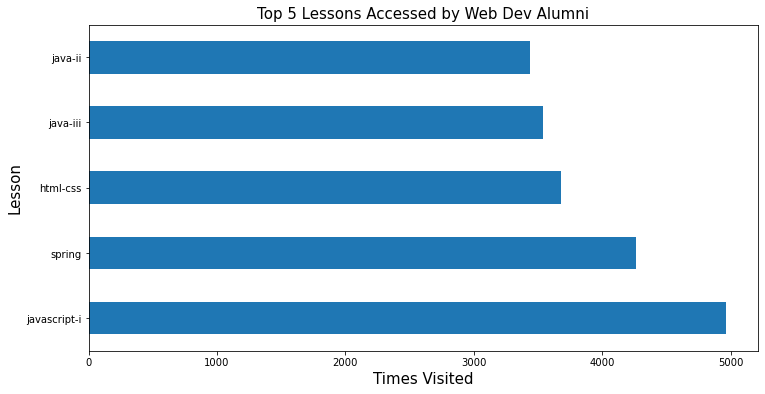

In [118]:
# Visualize paths most accessed by Web_Dev alumni
web_dev_alumni.path.value_counts().head().plot.barh(figsize=(12,6))
plt.title('Top 5 Lessons Accessed by Web Dev Alumni', fontsize=15)
plt.ylabel('Lesson', fontsize=15)
plt.xlabel('Times Visited', fontsize=15)
plt.show()

In [119]:
# create a df of data science alumni active after graduation
data_science_alumni = df[(df.days_after_grad > '0') & (df.program == 'data_science') & (df.name != 'Staff') & (df.path != '/')]

In [120]:
data_science_alumni.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2020-01-31 11:05:13,data_science,False,1 days


In [121]:
# paths most accessed by data science alumni
data_science_alumni.path.value_counts().head()

sql/mysql-overview                          275
classification/overview                     266
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    126
Name: path, dtype: int64

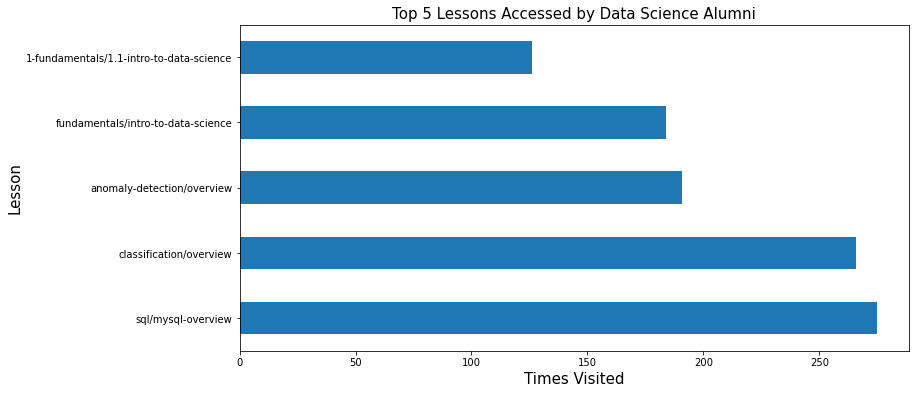

In [122]:
# Visualize paths most accessed by data science alumni
data_science_alumni.path.value_counts().head().plot.barh(figsize=(12,6))
plt.title('Top 5 Lessons Accessed by Data Science Alumni', fontsize=15)
plt.ylabel('Lesson', fontsize=15)
plt.xlabel('Times Visited', fontsize=15)
plt.show()